In [27]:
import numpy as np
import matplotlib.pyplot as plt

Although an analytical formula exists for linear regression. It is still possible to solve for the optimal weights using gradient descent.
Recall that weight updates via gradient descent are computed as follows: 

$
w_j := w_j - \alpha \dfrac{\partial}{\partial w_j}\text{Loss}(w)
$

for linear regression our hypothesis is defined as follows: 

$
h_w(x) = w^{T}x = w_0 + w_1 x_1 + \dots + w_p x_p
$

where $x_0$ is assumed to be 1 to give us the bias term.

For linear regression, we use Mean Squared Error as our loss function. For $N$ training examples, this is defined as follows:

$
\mathcal{L}(h_w(x), y) = \sum_{i=0}^{N} (h_w(x^{(i)}) - y^{(i)})^2
$

where $x^{(i)}$ is taken to mean the $i^{\text{th}}$ training example. Our aim is to find the values of $w$ that minimise this loss function. It's trivial to show that:

$
\dfrac{\partial \mathcal{L}}{\partial w_j} = \frac{-2}{N} \sum_{i=0}^{N}(y^{(i)}-w^{T}x^{(i)})x^{(i)}_j
$

Substituting this into our gradient descent equation, we get the following weight update rule: 

$
w_j := w_j + \dfrac{\alpha}{N} \sum_{i=0}^{N}(y^{(i)}-w^{T}x^{(i)})x^{(i)}_j
$

Let's now write the python code to perform this:

In [172]:
np.random.seed(25)
w = np.random.randn(2)
features = np.c_[np.ones(500), np.random.normal(size=500)]
y = np.dot(w, features.T) + np.random.normal(size=500)

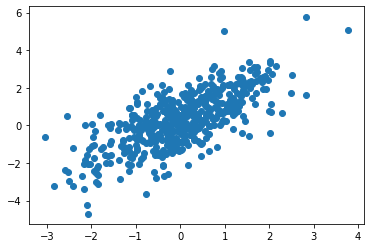

In [136]:
plt.scatter(features[:, 1], y) 

In [188]:
def update_weights(w, features, labels):
    alpha = 0.01
    
    predictions = np.dot(features, w)
    residuals = labels - predictions
    loss = np.dot(features.T, residuals)
    
    adjustment = loss.sum()
    adjustment = (adjustment * alpha)/len(features)
    return w + adjustment

def gradient_descent(features, labels):
    D = features.shape[1]
    w = np.random.randn(D)
    
    for i in range(5000):
        w = update_weights(w, features, labels)
    return w

In [189]:
weights = gradient_descent(features, y)

In [190]:
xs = np.c_[np.ones(50), np.linspace(-4, 4, 50)]
ys = np.dot(xs, weights)

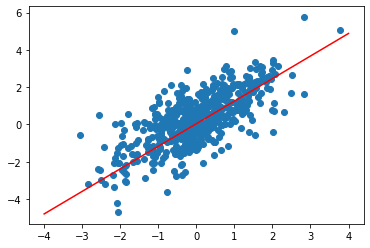

In [191]:
plt.scatter(features[:, 1], y)
plt.plot(xs[:, 1], ys, c='r')